In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [2]:
raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()


# 슈퍼호스트 결측치 제거(5%미만)
- 84397  =>  84306
# 리뷰수 = 0 제거
- (리뷰수 =  0 > 리뷰 점수 x > 얻을 수 있는게 없음)
- 84306  =>  58744 


In [3]:
df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

df['숙소_가격']


0        $250.00
1        $140.00
2        $107.00
3        $200.00
4            NaN
          ...   
84392     $80.00
84393    $167.00
84394     $98.00
84395    $296.00
84396     $71.00
Name: 숙소_가격, Length: 84397, dtype: object

In [4]:
print(len(df))
df = df[~df['슈퍼호스트'].isnull()]
print(len(df))

84397
84306


In [5]:
df = df[df['리뷰수']!=0]
print(len(df))

58744


#  숙소가격 null값인 경우
- 숙소가격 null 개수 : 16993
- 욕실수            16951

- 침실수             4963

- 침대수            16951

나머지는 5%미만

In [6]:
print(f"숙소가격 null 개수 : {df['숙소_가격'].isnull().sum()}")

숙소가격 null 개수 : 16993


In [7]:
df[df['숙소_가격'].isnull()].isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16951
침실수             4963
침대수            16951
편의시설               0
숙소_가격          16993
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        9
숙소_청결도_리뷰점수        7
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         8
숙소_위치_리뷰점수        14
숙소_가격_리뷰점수        15
평균_리뷰수             0
url                0
dtype: int64

# 숙소가격 값 있는 경우
-  41751개

- 전부 5%미만 제거 가능

In [8]:
len(df[~df['숙소_가격'].isnull()])

41751

In [9]:
df[~df['숙소_가격'].isnull()].isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64

# 숙소_지역 별 가격

In [27]:
check1['숙소_지역'].unique()

array(['Observatoire', 'Temple', 'Hôtel-de-Ville', 'Entrepôt', 'Louvre',
       'Buttes-Montmartre', 'Opéra', 'Batignolles-Monceau', 'Passy',
       'Élysée', 'Vaugirard', 'Bourse', 'Popincourt', 'Gobelins',
       'Buttes-Chaumont', 'Panthéon', 'Luxembourg', 'Reuilly',
       'Ménilmontant', 'Palais-Bourbon'], dtype=object)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_30840\2726590358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


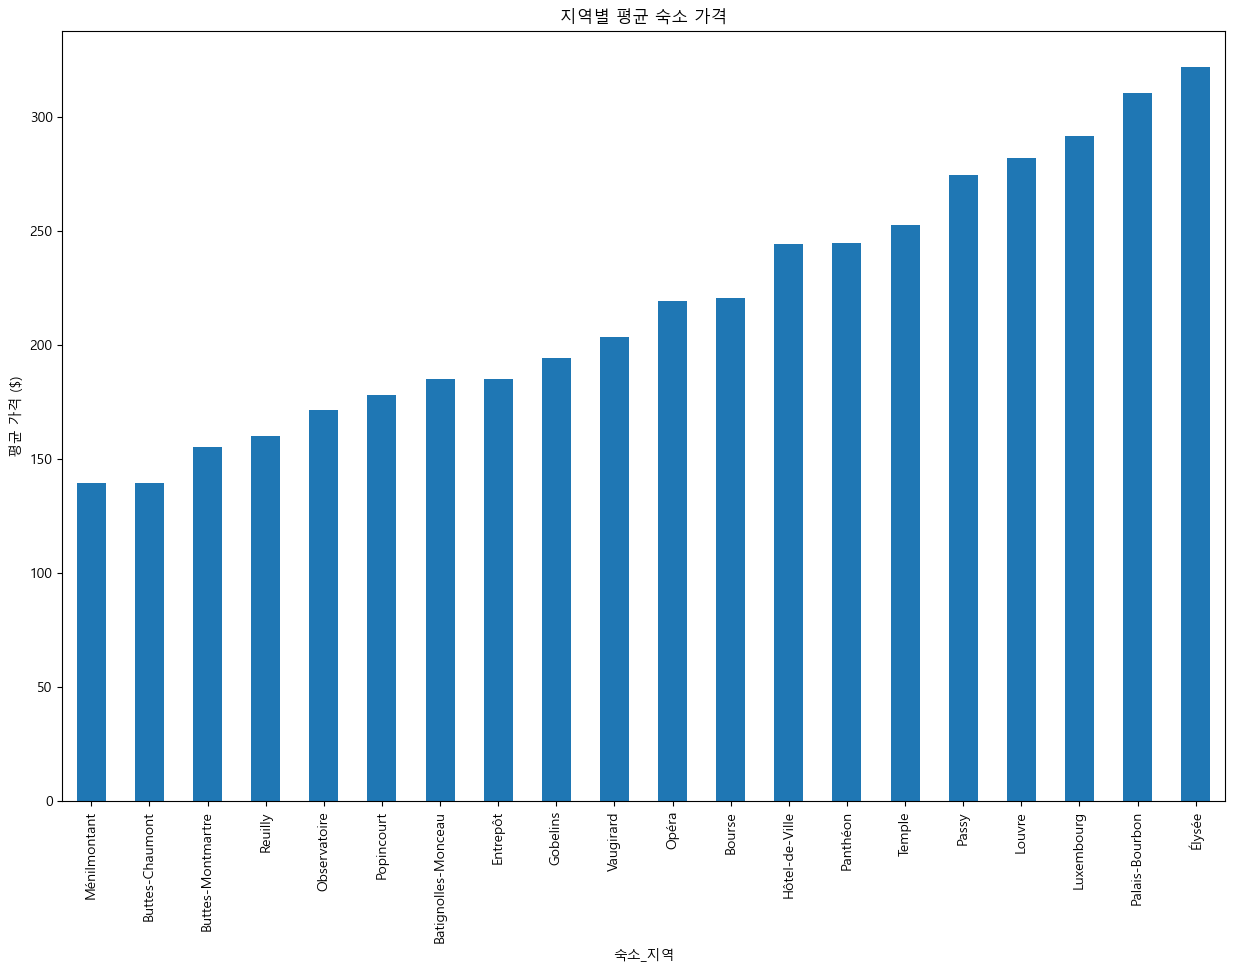

In [10]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 지역별 평균 가격 계산
average_prices = check1.groupby('숙소_지역')['숙소_가격'].mean().sort_values()

# 평균 가격 시각화
plt.figure(figsize=(15, 10))
average_prices.plot(kind='bar')
plt.title('지역별 평균 숙소 가격')
plt.ylabel('평균 가격 ($)')
plt.show()

In [11]:
print(f" 숙소 지역 평균 가격 \n{average_prices}")


 숙소 지역 평균 가격 
숙소_지역
Ménilmontant           139.145755
Buttes-Chaumont        139.235858
Buttes-Montmartre      155.177555
Reuilly                160.138278
Observatoire           171.171622
Popincourt             178.066594
Batignolles-Monceau    184.825720
Entrepôt               184.926013
Gobelins               194.334347
Vaugirard              203.207112
Opéra                  219.164740
Bourse                 220.254051
Hôtel-de-Ville         244.094569
Panthéon               244.541042
Temple                 252.568286
Passy                  274.401444
Louvre                 281.741877
Luxembourg             291.631864
Palais-Bourbon         310.489895
Élysée                 321.526020
Name: 숙소_가격, dtype: float64


In [12]:
average_prices = check1.groupby('숙소_유형')['숙소_가격'].mean().sort_values()
print(f" 숙소 유형 평균 가격 \n{average_prices}")


 숙소 유형 평균 가격 
숙소_유형
Shared room         75.600000
Private room       145.454273
Entire home/apt    212.793439
Hotel room         274.474157
Name: 숙소_가격, dtype: float64


# Anova분석 (숙소_가격, 숙소_지역)
- 결과 : 관계있음

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_지역', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)


                sum_sq       df         F         PR(>F)
숙소_지역     1.103898e+08     19.0  28.38907  1.499881e-101
Residual  8.540496e+09  41731.0       NaN            NaN


# Anova분석 (숙소_가격,숙소_유형)
- 결과 : 관계있음

In [14]:
# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_유형', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)

                sum_sq       df          F        PR(>F)
숙소_유형     2.065147e+07      3.0  33.299087  1.733753e-21
Residual  8.630234e+09  41747.0        NaN           NaN


# 지역 + 유형 별 가격 평균
- 생각보다 차이 많이 남

In [15]:
check1.groupby(['숙소_지역','숙소_유형'])['숙소_가격'].mean().sort_values()

숙소_지역            숙소_유형          
Temple           Shared room         43.227273
Buttes-Chaumont  Shared room         47.260870
Popincourt       Shared room         47.823529
Observatoire     Shared room         49.333333
Reuilly          Shared room         59.000000
                                       ...    
Élysée           Entire home/apt    332.095429
Palais-Bourbon   Hotel room         347.636364
Vaugirard        Hotel room         354.108108
Temple           Hotel room         370.166667
Bourse           Hotel room         786.250000
Name: 숙소_가격, Length: 79, dtype: float64

In [16]:
check1[check1['숙소_유형'] == 'Hotel room']

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url
961,914070,3980291,t,3.0,Passy,Hotel room,2,1.0,1.0,1.0,...,1,4.91,4.90,4.75,4.95,4.98,4.96,4.85,1.94,https://www.airbnb.com/rooms/914070
3777,4132978,7608379,f,2.0,Palais-Bourbon,Hotel room,6,2.5,3.0,5.0,...,0,4.70,4.73,4.64,4.69,4.70,4.94,4.54,0.84,https://www.airbnb.com/rooms/4132978
9072,9763149,50342512,f,6.0,Batignolles-Monceau,Hotel room,5,2.0,2.0,3.0,...,0,4.67,4.67,5.00,4.50,4.83,4.17,4.33,0.06,https://www.airbnb.com/rooms/9763149
9080,9763165,50342512,f,6.0,Buttes-Montmartre,Hotel room,2,1.0,1.0,1.0,...,0,4.35,4.50,4.55,4.79,4.80,4.26,4.05,0.20,https://www.airbnb.com/rooms/9763165
10919,12534183,67902959,f,7.0,Vaugirard,Hotel room,4,1.0,1.0,2.0,...,0,4.70,4.72,4.87,4.83,4.83,4.63,4.76,1.10,https://www.airbnb.com/rooms/12534183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29198,39189665,299271608,f,7.0,Batignolles-Monceau,Hotel room,2,1.0,1.0,1.0,...,4,4.51,4.50,4.62,4.63,4.69,4.71,4.45,5.05,https://www.airbnb.com/rooms/39189665
29199,39189852,299271608,f,7.0,Batignolles-Monceau,Hotel room,2,1.0,1.0,1.0,...,0,4.00,4.42,4.58,4.42,4.25,4.33,3.83,0.22,https://www.airbnb.com/rooms/39189852
29204,39190011,299271608,f,7.0,Batignolles-Monceau,Hotel room,3,1.0,1.0,2.0,...,0,4.50,4.56,4.64,4.81,4.75,4.74,4.48,1.80,https://www.airbnb.com/rooms/39190011
42204,636051848763827734,458723902,f,12.0,Hôtel-de-Ville,Hotel room,3,1.5,1.0,2.0,...,0,4.23,4.38,4.08,4.41,4.21,4.87,4.00,1.87,https://www.airbnb.com/rooms/636051848763827734


In [17]:
# 상위 10개 데이터 확인용
top_10_details = check1.loc[check1['숙소_가격'].sort_values(ascending=False).head(10).index, ['숙소_id', '숙소_가격', 'url']]


# 가격 확인 결과 
 
23285448 없음

873142104727787209 : 없음

644744645250321094 : 다름

36624656 : 다름


+ 월별, 일별 나오는거 해결?


In [18]:
top_10_details

,숙소_id,숙소_가격,url
27548,36624656,53239.0,https://www.airbnb.com/rooms/36624656
24552,32740447,18846.0,https://www.airbnb.com/rooms/32740447
53850,873142104727787209,15899.0,https://www.airbnb.com/rooms/873142104727787209
43061,650613932629146572,15000.0,https://www.airbnb.com/rooms/650613932629146572
39408,557849127896979136,11600.0,https://www.airbnb.com/rooms/557849127896979136
19014,23285448,10899.0,https://www.airbnb.com/rooms/23285448
28126,37250543,10000.0,https://www.airbnb.com/rooms/37250543
42631,644744645250321094,10000.0,https://www.airbnb.com/rooms/644744645250321094
14576,17250002,10000.0,https://www.airbnb.com/rooms/17250002
25955,34663834,10000.0,https://www.airbnb.com/rooms/34663834


In [19]:
check1[check1['숙소_가격']==10000.0]

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url
14576,17250002,17393810,f,1.0,Popincourt,Entire home/apt,4,1.0,1.0,2.0,...,0,4.42,4.73,4.62,4.46,4.46,4.62,4.36,0.31,https://www.airbnb.com/rooms/17250002
25955,34663834,15313021,f,1.0,Vaugirard,Entire home/apt,4,1.0,0.0,4.0,...,0,3.78,4.11,4.11,4.67,4.67,4.00,4.00,0.16,https://www.airbnb.com/rooms/34663834
28126,37250543,283731649,f,2.0,Passy,Entire home/apt,10,5.5,5.0,5.0,...,0,5.00,5.00,5.00,5.00,5.00,4.80,4.80,0.34,https://www.airbnb.com/rooms/37250543
28577,38403989,42782996,f,14.0,Temple,Private room,4,1.5,1.0,1.0,...,0,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.15,https://www.airbnb.com/rooms/38403989
32845,44218823,356267449,f,1.0,Gobelins,Entire home/apt,4,1.0,1.0,2.0,...,0,4.79,4.86,4.93,4.82,4.82,4.71,4.75,0.63,https://www.airbnb.com/rooms/44218823
42631,644744645250321094,463045348,t,1.0,Temple,Entire home/apt,3,1.0,1.0,1.0,...,0,4.72,4.85,4.90,4.59,4.87,5.00,4.59,1.91,https://www.airbnb.com/rooms/644744645250321094


In [20]:
check1['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [21]:
check1[check1['숙소_유형']=='Shared room'][['침대수','침실수','욕실수']]

,침대수,침실수,욕실수
463,2.0,1.0,1.0
1113,4.0,1.0,1.0
1265,2.0,1.0,1.0
1336,1.0,1.0,1.0
1664,1.0,1.0,1.0
...,...,...,...
70725,1.0,1.0,1.0
70922,0.0,1.0,1.0
72755,1.0,1.0,0.5
79642,6.0,1.0,1.0


In [22]:
print(f"전체 개수 : {len(check1)}")
print(f"shared room 개수 : {len(check1[check1['숙소_유형']=='Shared room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Shared room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Shared room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Shared room']['침실수'].isnull().sum()}")


전체 개수 : 41751
shared room 개수 : 200
침대수 : 0
침실수 : 0
욕실수 : 0


In [23]:
print(f"전체 개수 : {len(check1)}")
print(f"Entire home/apt  개수 : {len(check1[check1['숙소_유형']=='Entire home/apt'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Entire home/apt']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Entire home/apt']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Entire home/apt']['침실수'].isnull().sum()}")


전체 개수 : 41751
Entire home/apt  개수 : 37432
침대수 : 18
침실수 : 44
욕실수 : 44


In [24]:
print(f"전체 개수 : {len(check1)}")
print(f"Private room  개수 : {len(check1[check1['숙소_유형']=='Private room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Private room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Private room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Private room']['침실수'].isnull().sum()}")


전체 개수 : 41751
Private room  개수 : 3674
침대수 : 11
침실수 : 1
욕실수 : 1


In [25]:
print(f"전체 개수 : {len(check1)}")
print(f"Hotel room room  개수 : {len(check1[check1['숙소_유형']=='Hotel room'])}")
print(f"침대수 : {check1[check1['숙소_유형']=='Hotel room']['침대수'].isnull().sum()}")
print(f"침실수 : {check1[check1['숙소_유형']=='Hotel room']['침실수'].isnull().sum()}")
print(f"욕실수 : {check1[check1['숙소_유형']=='Hotel room']['침실수'].isnull().sum()}")


전체 개수 : 41751
Hotel room room  개수 : 445
침대수 : 54
침실수 : 0
욕실수 : 0


In [26]:
check1.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64